
# **Métodos de Runge-Kutta**

## **Alumno: Niño Pedraza Eduardo**

En esta práctica se compararán los métodos de **Runge-Kutta de orden 2 (Heun)** y **Runge-Kutta de orden 4**.  

Instrucciones:
1. Lee el planteamiento de cada ejercicio.
2. Modifica el código dado para resolver la ecuación diferencial propuesta.
3. Ejecuta el código y analiza las gráficas y los errores obtenidos.
4. Contesta las preguntas que acompañan cada ejercicio.

h ≈ 0.10000
Error máximo RK2 (Heun): 2.282126e-02
Error máximo RK4:        1.133156e-05


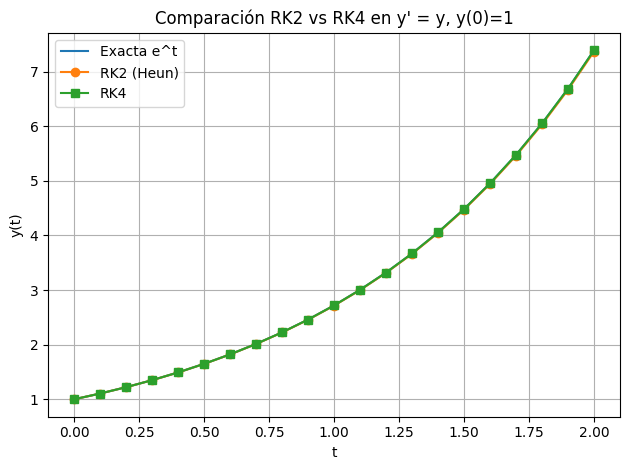

In [ ]:
# - Implementa RK2 (Heun) y RK4
# - Problema de prueba: y' = y, y(0)=1, solución exacta e^t
# - Grafica Exacta, RK2 y RK4 en la misma figura
# - Imprime errores máximos
#
import numpy as np
import matplotlib.pyplot as plt
def rk2_step(f, t, y, h):
    k1 = f(t, y)
    k2 = f(t + h, y + h * k1)
    return y + (h/2.0) * (k1 + k2)
def rk4_step(f, t, y, h):
    k1 = f(t, y)
    k2 = f(t + 0.5*h, y + 0.5*h*k1)
    k3 = f(t + 0.5*h, y + 0.5*h*k2)
    k4 = f(t + h, y + h*k3)
    return y + (h/6.0) * (k1 + 2*k2 + 2*k3 + k4)
def solve_rk(f, t0, y0, tf, h, stepper):
    n = int(np.ceil((tf - t0) / h))
    h = (tf - t0) / n  # ajustar para terminar exactamente en tf
    t = np.linspace(t0, tf, n + 1)
    y = np.zeros_like(t, dtype=float)
    y[0] = y0
    for i in range(n):
        y[i+1] = stepper(f, t[i], y[i], h)
    return t, y
# ----- Problema de prueba -----
f = lambda t, y: y                   # y' = y
y_exact = lambda t: np.exp(t)        # solución exacta e^t
t0, tf = 0.0, 2.0
y0 = 1.0
h = 0.1
# Resolver con RK2 y RK4
t_rk2, y_rk2 = solve_rk(f, t0, y0, tf, h, rk2_step)
t_rk4, y_rk4 = solve_rk(f, t0, y0, tf, h, rk4_step)
# Exacta en malla RK4 (idénticas salvo ajuste mínimo)
t = t_rk4
y_ex = y_exact(t)
# Si las mallas difieren por ajuste, interpola RK2 a malla t
if not np.array_equal(t_rk2, t):
    y_rk2_interp = np.interp(t, t_rk2, y_rk2)
else:
    y_rk2_interp = y_rk2
err_rk2 = np.max(np.abs(y_rk2_interp - y_ex))
err_rk4 = np.max(np.abs(y_rk4 - y_ex))
print(f"h ≈ {h:.5f}")
print(f"Error máximo RK2 (Heun): {err_rk2:.6e}")
print(f"Error máximo RK4:        {err_rk4:.6e}")
# ----- Gráfica -----
plt.figure()
plt.plot(t, y_ex, label="Exacta e^t")
plt.plot(t_rk2, y_rk2, 'o-', label="RK2 (Heun)")
plt.plot(t_rk4, y_rk4, 's-', label="RK4")
plt.xlabel("t")
plt.ylabel("y(t)")
plt.title("Comparación RK2 vs RK4 en y' = y, y(0)=1")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## **Ejercicio 1**
Considera la ecuación diferencial:
$$\frac{dy}{dt} = -2y, \quad y(0)=1$$

- Usa los métodos RK2 y RK4 para aproximar la solución en el intervalo \([0,2\).
- Grafica la solución exacta junto con las aproximaciones numéricas.
- Compara los errores máximos obtenidos con cada método.
-¿Qué método da un error menor y por qué?

h ≈ 0.10000
Error máximo RK2 (Heun): 2.860402e-03
Error máximo RK4:        5.796954e-06


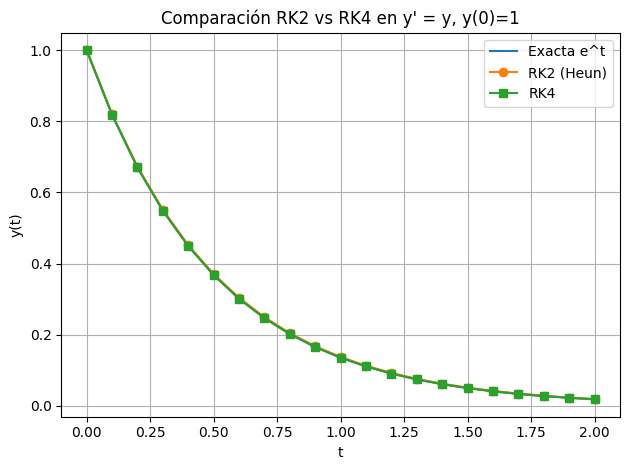

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def rk2_step(f, t, y, h):
    k1 = f(t, y)
    k2 = f(t + h, y + h * k1)
    return y + (h/2.0) * (k1 + k2)
def rk4_step(f, t, y, h):
    k1 = f(t, y)
    k2 = f(t + 0.5*h, y + 0.5*h*k1)
    k3 = f(t + 0.5*h, y + 0.5*h*k2)
    k4 = f(t + h, y + h*k3)
    return y + (h/6.0) * (k1 + 2*k2 + 2*k3 + k4)
def solve_rk(f, t0, y0, tf, h, stepper):
    n = int(np.ceil((tf - t0) / h))
    h = (tf - t0) / n  # ajustar para terminar exactamente en tf
    t = np.linspace(t0, tf, n + 1)
    y = np.zeros_like(t, dtype=float)
    y[0] = y0
    for i in range(n):
        y[i+1] = stepper(f, t[i], y[i], h)
    return t, y
# ----- Problema de prueba -----
f = lambda t, y: -2*y                   # y' = -2*y
y_exact = lambda t: np.exp(-2*t)        # solución exacta e^-2*t
t0, tf = 0.0, 2.0
y0 = 1.0
h = 0.1
# Resolver con RK2 y RK4
t_rk2, y_rk2 = solve_rk(f, t0, y0, tf, h, rk2_step)
t_rk4, y_rk4 = solve_rk(f, t0, y0, tf, h, rk4_step)
# Exacta en malla RK4 (idénticas salvo ajuste mínimo)
t = t_rk4
y_ex = y_exact(t)
# Si las mallas difieren por ajuste, interpola RK2 a malla t
if not np.array_equal(t_rk2, t):
    y_rk2_interp = np.interp(t, t_rk2, y_rk2)
else:
    y_rk2_interp = y_rk2
err_rk2 = np.max(np.abs(y_rk2_interp - y_ex))
err_rk4 = np.max(np.abs(y_rk4 - y_ex))
print(f"h ≈ {h:.5f}")
print(f"Error máximo RK2 (Heun): {err_rk2:.6e}")
print(f"Error máximo RK4:        {err_rk4:.6e}")
# ----- Gráfica -----
plt.figure()
plt.plot(t, y_ex, label="Exacta e^t")
plt.plot(t_rk2, y_rk2, 'o-', label="RK2 (Heun)")
plt.plot(t_rk4, y_rk4, 's-', label="RK4")
plt.xlabel("t")
plt.ylabel("y(t)")
plt.title("Comparación RK2 vs RK4 en y' = y, y(0)=1")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

De las gráficas de los metodos de RK2 Y RK4 notamos que tenemos un buen ajuste con errores maximos de 2.860402e-03 y 5.796954e-06 respectivamente, vemos que el aumentar el tamaño de puntos intermedios para hacer el ajuste nos genera un cambio en los errores de ordenes de grado 3. El método de que da menor error es el de RK4, pues la serie de Taylor que tomamos es más precisa, además podemos ver que en este caso tomamos más valores para generar la aproximación.


## **Ejercicio 2**
Considera la ecuación de crecimiento logístico

$$ \frac{dy}{dt} = y(1-y), \quad y(0)=0.1$$

- Resuelve en el intervalo [0,10] con RK2 y RK4.

**Solución:** Procedemos a resolver la ecuación $\frac{dy}{dt} = y(1-y)$, para ello usando el método de separación de variables tenemos:

$$\frac{dy}{dt} = y(1-y) \Rightarrow \frac{dy}{y(1 -y)} =dt$$

Usando fracciones parciales tenemos que:

$$ \frac{1}{y(1 -y)} =  \frac{A}{y}+ \frac{B}{(1 -y)} =  \frac{A(1-y)+By}{y(1 -y)} =  \frac{(B-A)y+A}{y(1 -y)}    $$

De aquí tenemos que:
$$(B-A)y = 0$$
y
$$A=1$$

Con ello tambien tenemos que $B=1$, así:
$$ \frac{1}{y(1 -y)} =  \frac{1}{y}+ \frac{1}{(1 -y)}$$

De aquí nuestra ecuación es:
$$\frac{dy}{y(1 -y)} =dt \Rightarrow  (\frac{1}{y}+ \frac{1}{(1 -y)})dy = dt$$

Integrando de ambos lados desde 0.1 hasta t tenemos:

$$\int_{0.1}^{t}(\frac{1}{y}+ \frac{1}{(1 -y)})dy = \int_{0.1}^{t}ds$$

De aqui:

$$ln(y)|_{0.1}^{t}-ln(1-y))|_{0.1}^{t}=s|_{0.1}^{t}$$

- Grafica las soluciones numéricas junto con la solución exacta:

$$ y(t) = \frac{e^t}{9 + e^t}$$

- ¿En qué regiones del intervalo los métodos presentan mayor error?

h ≈ 0.10000
Error máximo RK2 (Heun): 4.243303e-04
Error máximo RK4:        1.193857e-07


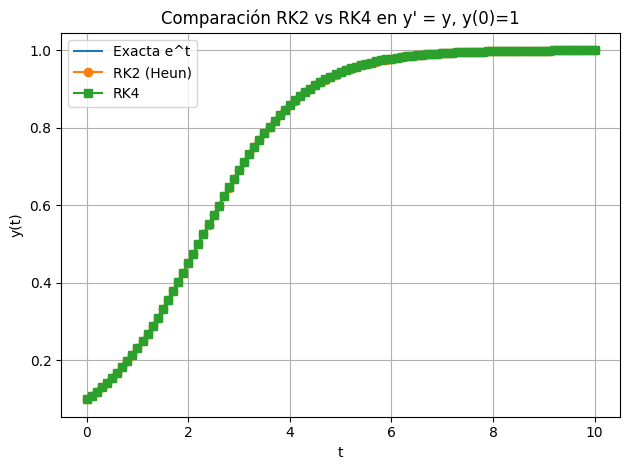

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def rk2_step(f, t, y, h):
    k1 = f(t, y)
    k2 = f(t + h, y + h * k1)
    return y + (h/2.0) * (k1 + k2)
def rk4_step(f, t, y, h):
    k1 = f(t, y)
    k2 = f(t + 0.5*h, y + 0.5*h*k1)
    k3 = f(t + 0.5*h, y + 0.5*h*k2)
    k4 = f(t + h, y + h*k3)
    return y + (h/6.0) * (k1 + 2*k2 + 2*k3 + k4)
def solve_rk(f, t0, y0, tf, h, stepper):
    n = int(np.ceil((tf - t0) / h))
    h = (tf - t0) / n  # ajustar para terminar exactamente en tf
    t = np.linspace(t0, tf, n + 1)
    y = np.zeros_like(t, dtype=float)
    y[0] = y0
    for i in range(n):
        y[i+1] = stepper(f, t[i], y[i], h)
    return t, y
# ----- Problema de prueba -----
f = lambda t, y: y*(1-y)                   # y' = y(1-y)
y_exact = lambda t: np.exp(t)/(9+np.exp(t))       # solución exacta e^t/9+e^t
t0, tf = 0.0, 10.0
y0 = 0.1
h = 0.1
# Resolver con RK2 y RK4
t_rk2, y_rk2 = solve_rk(f, t0, y0, tf, h, rk2_step)
t_rk4, y_rk4 = solve_rk(f, t0, y0, tf, h, rk4_step)
# Exacta en malla RK4 (idénticas salvo ajuste mínimo)
t = t_rk4
y_ex = y_exact(t)
# Si las mallas difieren por ajuste, interpola RK2 a malla t
if not np.array_equal(t_rk2, t):
    y_rk2_interp = np.interp(t, t_rk2, y_rk2)
else:
    y_rk2_interp = y_rk2
err_rk2 = np.max(np.abs(y_rk2_interp - y_ex))
err_rk4 = np.max(np.abs(y_rk4 - y_ex))
print(f"h ≈ {h:.5f}")
print(f"Error máximo RK2 (Heun): {err_rk2:.6e}")
print(f"Error máximo RK4:        {err_rk4:.6e}")
# ----- Gráfica -----
plt.figure()
plt.plot(t, y_ex, label="Exacta e^t")
plt.plot(t_rk2, y_rk2, 'o-', label="RK2 (Heun)")
plt.plot(t_rk4, y_rk4, 's-', label="RK4")
plt.xlabel("t")
plt.ylabel("y(t)")
plt.title("Comparación RK2 vs RK4 en y' = y, y(0)=1")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

De las gráficas de los metodos de RK2 Y RK4 notamos que tenemos un buen ajuste con errores maximos de 4.243303e-04 y 1.193857e-07 respectivamente, vemos que el aumentar el tamaño de puntos intermedios para hacer el ajuste nos genera un cambio en los errores de ordenes de grado 3. El método de que da menor error es el de RK4, pues la serie de Taylor que tomamos es más precisa, además podemos ver que en este caso tomamos más valores para generar la aproximación. Ahora veamos que pasa cuando hacemos una perturbación

h ≈ 0.10000
Error máximo RK2 (Heun): 1.685003e-04
Error máximo RK4:        6.047490e-08


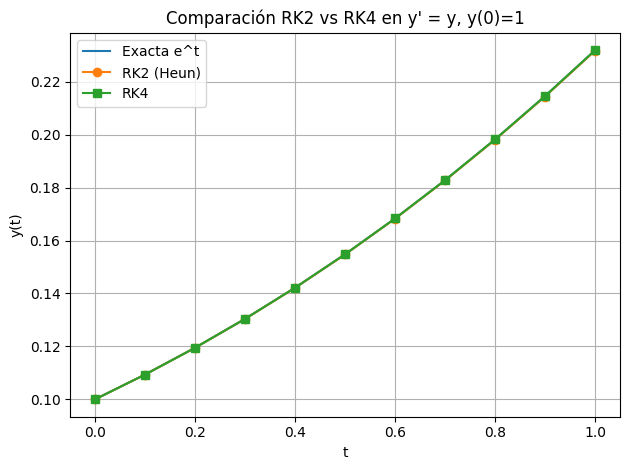

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def rk2_step(f, t, y, h):
    k1 = f(t, y)
    k2 = f(t + h, y + h * k1)
    return y + (h/2.0) * (k1 + k2)
def rk4_step(f, t, y, h):
    k1 = f(t, y)
    k2 = f(t + 0.5*h, y + 0.5*h*k1)
    k3 = f(t + 0.5*h, y + 0.5*h*k2)
    k4 = f(t + h, y + h*k3)
    return y + (h/6.0) * (k1 + 2*k2 + 2*k3 + k4)
def solve_rk(f, t0, y0, tf, h, stepper):
    n = int(np.ceil((tf - t0) / h))
    h = (tf - t0) / n  # ajustar para terminar exactamente en tf
    t = np.linspace(t0, tf, n + 1)
    y = np.zeros_like(t, dtype=float)
    y[0] = y0
    for i in range(n):
        y[i+1] = stepper(f, t[i], y[i], h)
    return t, y
# ----- Problema de prueba -----
f = lambda t, y: y*(1-y)                   # y' = y(1-y)
y_exact = lambda t: np.exp(t)/(9+np.exp(t))       # solución exacta e^t/9+e^t
t0, tf = 0.0, 1.0
y0 = 0.1
h = 0.1
# Resolver con RK2 y RK4
t_rk2, y_rk2 = solve_rk(f, t0, y0, tf, h, rk2_step)
t_rk4, y_rk4 = solve_rk(f, t0, y0, tf, h, rk4_step)
# Exacta en malla RK4 (idénticas salvo ajuste mínimo)
t = t_rk4
y_ex = y_exact(t)
# Si las mallas difieren por ajuste, interpola RK2 a malla t
if not np.array_equal(t_rk2, t):
    y_rk2_interp = np.interp(t, t_rk2, y_rk2)
else:
    y_rk2_interp = y_rk2
err_rk2 = np.max(np.abs(y_rk2_interp - y_ex))
err_rk4 = np.max(np.abs(y_rk4 - y_ex))
print(f"h ≈ {h:.5f}")
print(f"Error máximo RK2 (Heun): {err_rk2:.6e}")
print(f"Error máximo RK4:        {err_rk4:.6e}")
# ----- Gráfica -----
plt.figure()
plt.plot(t, y_ex, label="Exacta e^t")
plt.plot(t_rk2, y_rk2, 'o-', label="RK2 (Heun)")
plt.plot(t_rk4, y_rk4, 's-', label="RK4")
plt.xlabel("t")
plt.ylabel("y(t)")
plt.title("Comparación RK2 vs RK4 en y' = y, y(0)=1")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Vemos que conforme cambiamos el tiempo inicial la solución exacta y las soluciones graficadas los cambios son bastante evidentes, en este caso conforme vamos "achicando" el intervalo, en este caso de 0 a 1 tenemos que el error es de grado 4, ya es mucho más grande.

h ≈ 0.10000
Error máximo RK2 (Heun): 6.856684e-05
Error máximo RK4:        2.626765e-08


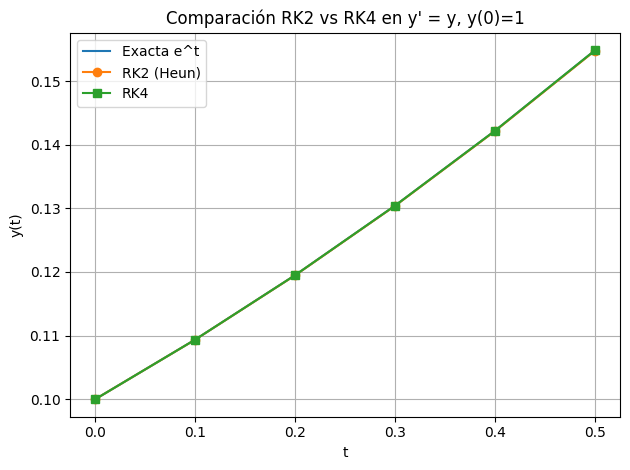

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def rk2_step(f, t, y, h):
    k1 = f(t, y)
    k2 = f(t + h, y + h * k1)
    return y + (h/2.0) * (k1 + k2)
def rk4_step(f, t, y, h):
    k1 = f(t, y)
    k2 = f(t + 0.5*h, y + 0.5*h*k1)
    k3 = f(t + 0.5*h, y + 0.5*h*k2)
    k4 = f(t + h, y + h*k3)
    return y + (h/6.0) * (k1 + 2*k2 + 2*k3 + k4)
def solve_rk(f, t0, y0, tf, h, stepper):
    n = int(np.ceil((tf - t0) / h))
    h = (tf - t0) / n  # ajustar para terminar exactamente en tf
    t = np.linspace(t0, tf, n + 1)
    y = np.zeros_like(t, dtype=float)
    y[0] = y0
    for i in range(n):
        y[i+1] = stepper(f, t[i], y[i], h)
    return t, y
# ----- Problema de prueba -----
f = lambda t, y: y*(1-y)                   # y' = y(1-y)
y_exact = lambda t: np.exp(t)/(9+np.exp(t))       # solución exacta e^t/9+e^t
t0, tf = 0.0, 0.5
y0 = 0.1
h = 0.1
# Resolver con RK2 y RK4
t_rk2, y_rk2 = solve_rk(f, t0, y0, tf, h, rk2_step)
t_rk4, y_rk4 = solve_rk(f, t0, y0, tf, h, rk4_step)
# Exacta en malla RK4 (idénticas salvo ajuste mínimo)
t = t_rk4
y_ex = y_exact(t)
# Si las mallas difieren por ajuste, interpola RK2 a malla t
if not np.array_equal(t_rk2, t):
    y_rk2_interp = np.interp(t, t_rk2, y_rk2)
else:
    y_rk2_interp = y_rk2
err_rk2 = np.max(np.abs(y_rk2_interp - y_ex))
err_rk4 = np.max(np.abs(y_rk4 - y_ex))
print(f"h ≈ {h:.5f}")
print(f"Error máximo RK2 (Heun): {err_rk2:.6e}")
print(f"Error máximo RK4:        {err_rk4:.6e}")
# ----- Gráfica -----
plt.figure()
plt.plot(t, y_ex, label="Exacta e^t")
plt.plot(t_rk2, y_rk2, 'o-', label="RK2 (Heun)")
plt.plot(t_rk4, y_rk4, 's-', label="RK4")
plt.xlabel("t")
plt.ylabel("y(t)")
plt.title("Comparación RK2 vs RK4 en y' = y, y(0)=1")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()